# 使用 MaixPy3 IDE 连接 MaixII-Dock



| 时间       | 负责人       |                      更新内容                      |
| ---------- | ------------ | :------------------------------------------------: |
| 2021-12-3  | Rui          |                    制定文档初稿                    |
| 2021-12-7  | 大老鼠 & Ray |                   微调排版及审核                   |
| 2021-12-8  | Rui          |      添加 IDE 基本的使用介绍,MaixPy3 入门目录      |
| 2022-01-14 | dalaoshu     |          配合 IDE 更新优化了用户使用体验           |
| 2022-01-17 | dalaoshu     | 根据小徐同学的视频反馈，修订了用词和补充 SD 卡说明 |
| 2022-03-02 | Rui          |    添加 MaixII-Dock 开箱视频，修改部分表述错误     |
| 2022-04-14 | Coty         |        添加 main.py 会被 kill 掉的解决方法         |
| 2022-06-09 | dalaoshu     |        重新强调了 m2dock 必须有 U 盘出现才能使用         |

## 产品宣传

<p align="center">
    <iframe src="//player.bilibili.com/player.html?aid=298543445&bvid=BV1sF411u7xb&cid=586467021&page=1" scrolling="no" border="0" frameborder="no" framespacing="0" allowfullscreen="true" style="max-width:640px; max-height:480px;"> </iframe>
</p>

## 开箱说明

<p align="center">
    <iframe src="//player.bilibili.com/player.html?bvid=BV14Z4y147Lg&page=1" scrolling="no" border="0" frameborder="no" framespacing="0" allowfullscreen="true" style="max-width:640px; max-height:480px;"> </iframe>
</p>

**使用前请仔细阅读以下内容，可以减少很多疑问**

## 避坑要点（重要）

1. 准备好可以启动系统的卡，如购买已烧录好系统的内存卡，可在购买时选择预烧录套餐（没有的同学需要[自行烧录](https://wiki.sipeed.com/hardware/zh/maixII/M2/flash.html)）。
2. 烧录或更新到最新 MaixPy3 镜像，确认 `pip list` 中的 maixpy3 包版本大于 0.4.9 以上。
3. 检查 USB 线和 USB 口是正常可用的，确定板子通电并插入电脑后，驱动有提示，屏幕有背光，硬件无损坏。
4. 安装好 [MaixPy3 IDE](./MaixPy3_IDE.md) 软件，确保版本大于 0.4.0 ，安装的时候会提示你安装驱动。
5. 确认安装软件时会弹出驱动安装程序，成功安装相关 adb 驱动后，连上硬件后在电脑中就会显示一个虚拟 U 盘，没有 U 盘出现不要继续，重启或重来直到 U 盘出现了再继续操作。
6. 确认 adb 终端程序和相关服务存在后，就可以直接运行 IDE 软件自带的例程了。
7. 将代码写进 main.py 后，给 MAIXii-Dock 上电，会自动执行 main.py 的代码。**如果想继续执行 main.py 的话，那么此时不要开启 jupyter 的 RPyc-Python **，否则会将 main.py 给 kill 掉。
如果自己的 main.py 不能成功执行，首先先检查是否开启了 maixpy3_notebook，如若开启那么将其停用，然后重新上电即可。

**停用操作如下:**

![停用操作](./assets/1.gif)

## 准备工作

0. 安装 MaixPy3 IDE 软件，它会在安装时**提示用户安装驱动**，安装好后会自动调用本机的浏览器弹出 jupyter notebook 的工作区，也就是你现在看到的文档，没有弹出可以点右下角托盘查看 IP 后手动进入。

    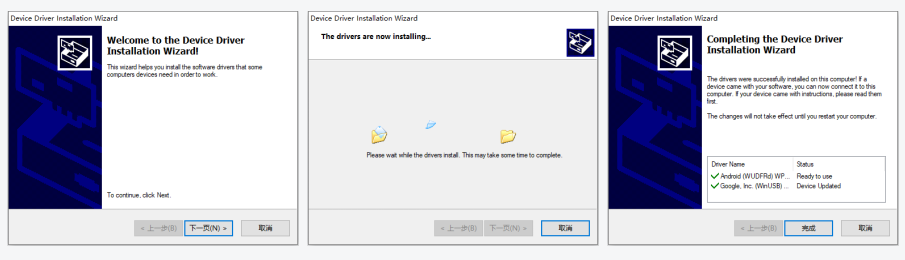

1. 使用一条可以传输数据的 Tpye-C **数据线**（如购买时附带的线）。
   不可以是充电线，或者转接头，尽量不要使用延长线或转接数据线。

    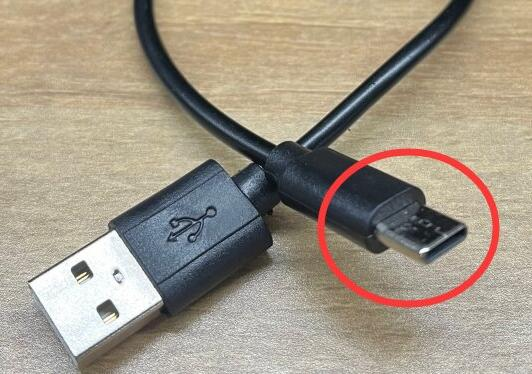

2. 插入烧录过 maixpy3 系统的 SD 卡。

    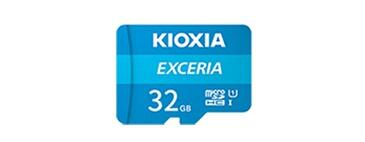

3. 将 板子 与 电脑 通过 **OTG USB** 口连接，确认设备通电亮起（power）电源**红灯**，请看下图红圈别接错。

    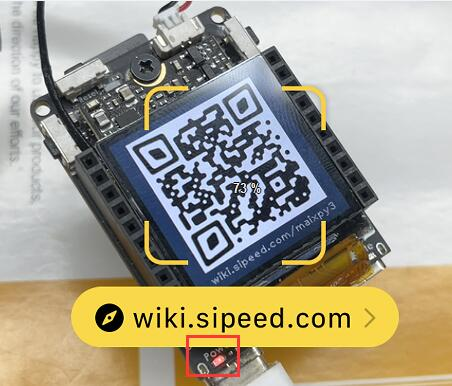

4. 确认板子屏幕出现 logo 和二维码（wiki）表示系统启动并已工作，此时电脑会弹出一个 U盘 盘符 ，这意味着板子的系统已经准备就绪。没有出现虚拟U盘的选项的话直接查看下一步

    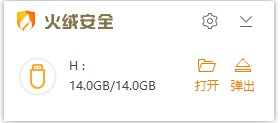

    > 电脑若弹出U盘虽坏或者需要修复的话，不用理会，可修也可以不修。
    > 虚拟 U 盘设备在传输较大文件可能会因为没有完整写入后因其他原因断开连接而丢失文件。

    虚拟U盘里的默认内容

    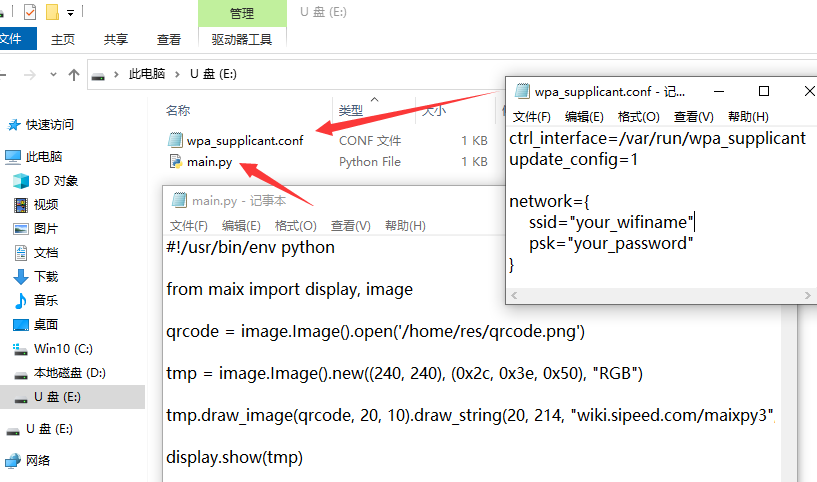

    > 该 U盘 目录对应的板子运行 linux 系统的 /root/ 目录；这里 main.py 是默认执行的开机脚本，wpa_supplicant.conf 是 WIFI 配置信息。

5. 如果没有出现 U盘 盘符（**没有 U 盘出现等于 ADB 驱动有问题，这是连不上 IDE 的**），则需要按下图手动卸载一下 Android ADB Interface 手机驱动（常见于 XX 手机助手）。或者检查一下电脑有没有其他应用占用了 adb 端口。又或者可以尝试其他 USB 接口。

    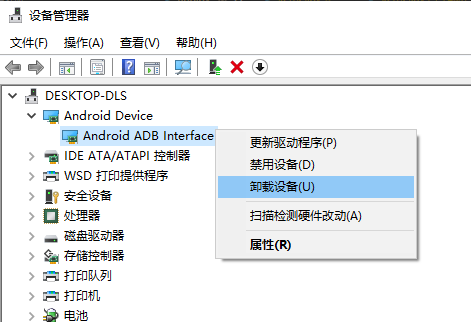

    找到它，勾选卸载驱动即可，此时 U 盘跳出，系统准备就绪，没有出现就去重装驱动和卸载。

    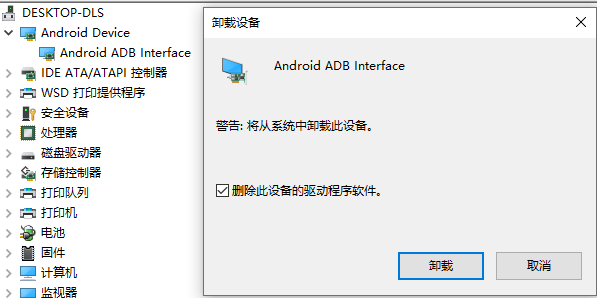

**如果 U 盘还是没有如上述步骤出现，可以尝试换个口，重烧烧录系统后重启设备或考虑换台电脑操作。这可能是个别系统驱动不兼容导致的，有问题的话可以在 bbs.sipeed.com 发帖给 @ 管理员帮忙解决。**

> 再三强调！！！板子必须满足开机 logo 、二维码画面或摄像头、发出 usb 驱动声音、安装 adb 驱动、电脑弹出 U 盘才能使用 IDE 开发，否则必定连接出错！！！


## 开始代码

运行前的可以检查一下运行环境是否正常，下述描述只与 Windows 平台有关，其他平台不需要。

- IDE 0.4.0 软件启动时会附带一个 keep_adb.exe 命令行终端的程序提供给熟悉 linux 终端操作开发板的同学。
  如果板子连接到电脑后没有成功弹出 U盘 盘符，那么命令行终端会一直提示没有发现设备。
  这时应该重新上面的准备工作确定弹出 U盘 盘符再接着下一步。
- IDE 0.4.2 后 keep_adb 服务会自动调用 adb 配置映射（forward）端口（22，18811，18812）。
- IDE 的内核切换成 Rpyc-python

    ![Rpyc-python](./assets/Rpyc-python.png)

- 可以在交互终端(即那个adb终端)输入 `ps | grep mjpg` 查看是否存在下图红框所指示的服务，存在的话说明板子连接的 ide 服务运行

    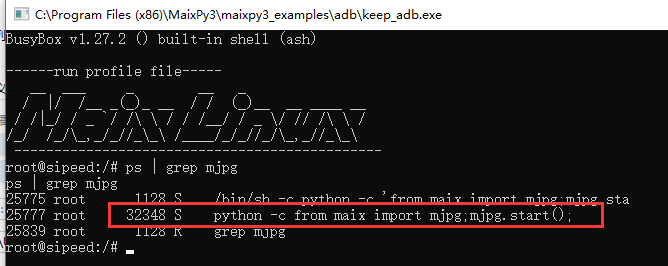
    
- 如果发现不存在 IDE 服务，可以在交互终端手动执行 `python -c 'from maix import mjpg;mjpg.start();'` 来启动服务，并把现象汇报到社区，目前发现该现象主要出现在 Windows 10 系统之间的差异上。
- 确认系统防火墙是否阻止了软件底层所需要 TCP 18811 18812 的端口号，主要用于运行程序和图像传输。

想知道更多，可以点此查看关于 [MaixPy3 IDE](https://wiki.sipeed.com/soft/maixpy3/zh/tools/MaixPy3_IDE.html) 的更加详细的介绍，此处不再赘述。

### 如何运行 Python 代码

点击选择代码块，点击上方工具中的运行，即可运行代码并输出结果，运行后会出现 * 表示程序正常运行。

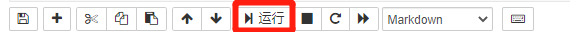

### 如何停止刚才运行的 Python 代码

选择正在运行的代码，点击上方工具栏中的停止，即可停止运行代码，快捷键是按两下 i 喔。

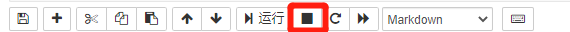

如果有其他程序正在运行的话，需要先点停止，等程序断开了后（代码块前的 * 号消失），再点运行。

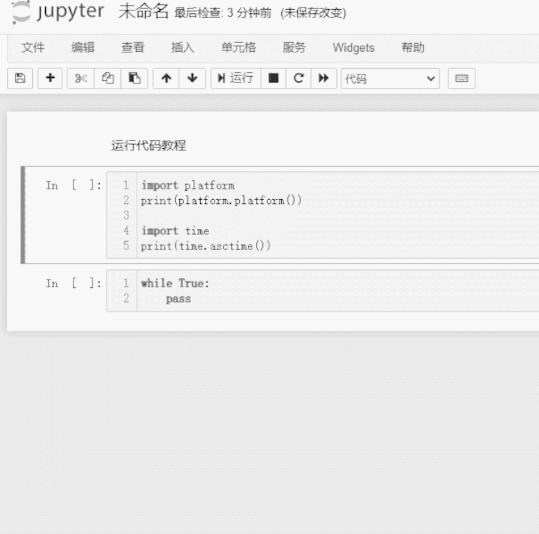

### 注意事项

IDE 的每个代码单元块是独立的，只有定义为全局变量才能在不同的代码单元块中传递。运行也是按开始的顺序进行排队运行，当前一个代码没有运行结束的时候，后一个代码是不会运行。

当出现代码运行之后没有出现结果，或者是卡住了，重启 IDE 和重启开发板就可以解决了。

## 首次尝试

复制下方代码块到 IDE， 点击上方菜单栏中的运行，来首次测试板子。

In [ ]:
import platform
print(platform.platform())

import time
print(time.asctime())


![](./assets/IDE_5.png)

上述结果可知：

一、本次运行这段代码的时间是 \[ rpyc-kernel \]( running at Wed Apr 27 09:45:07 2022 )

二、运行这段代码的平台是 Linux-4.9.118-armv7l-with-libc

三、本次运行这段代码时，板子系统时间是 Wed Apr 27 01:45:07 2022。这是时区不同，有兴趣的自己改成 GMT+8 就可以对上了

当代码运行的时间为当前时间，并打印出以上代码，说明开发板已经连接上并可以正常的使用




## 连接网络并更新软件

### 连接网络

开发板上的 OTG 接口与电脑连接之后，就会在资源管理器中得到一个 U盘 设备。通过记事本打开里面名为 `wpa_supplicant.conf` 文件

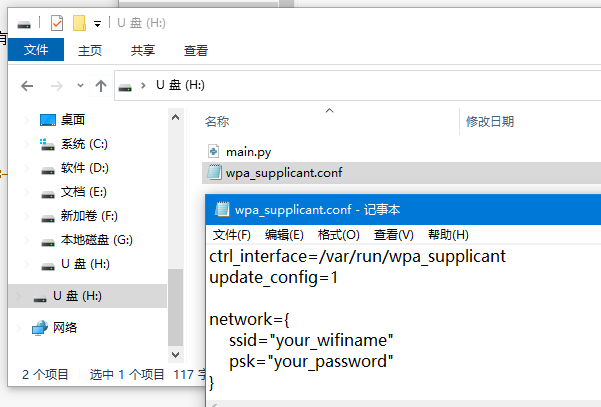

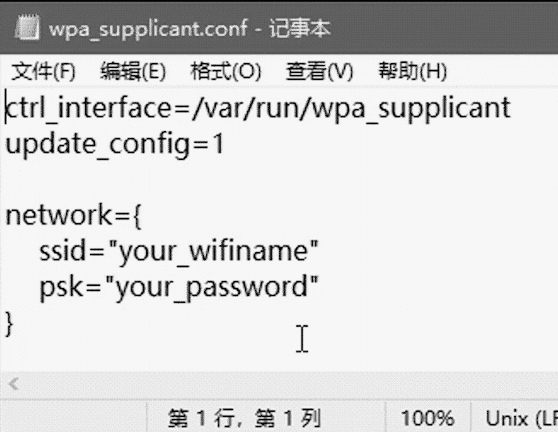

- wpa_supplicant.conf

```bash
ctrl_interface=/var/run/wpa_supplicant
update_config=1

network={
    ssid="yourWIFIname"
    psk="yourWIFIpassword"
}

```

将根据提示修改成需要连接的网络名字和密码。(只支持连接2.4G频段的WIFI，每个人的网络环境不同，也有可能连接不上)

### 如何更新 MaixPy3 包

可以手动下载最新的 MaixPy3 [安装包](https://pypi.org/project/maixpy3/#history)

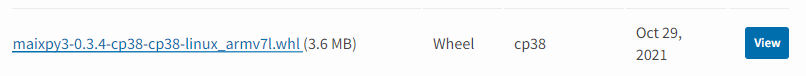

下载带有 cp8 的安装包，cp9 是给别的平台使用的。将这个安装的名字修改成 `maixpy3-9.9.9-cp38-cp38-linux_armv7l.whl`,直接存放到开发板中，重启开发板就会自动更新和安装 MaixPy3。

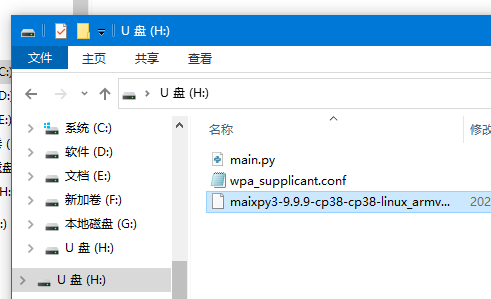

更新前请关闭 IDE 或不接 OTG 口，防止有其他操作影响系统的软件更新，在放入 U 盘后，断电开机会看到如下画面，如果超过 3 分钟画面没有变化，那可能就是失败了，就请重烧系统吧。（2022年1月14日至今还没出现过失败样本）

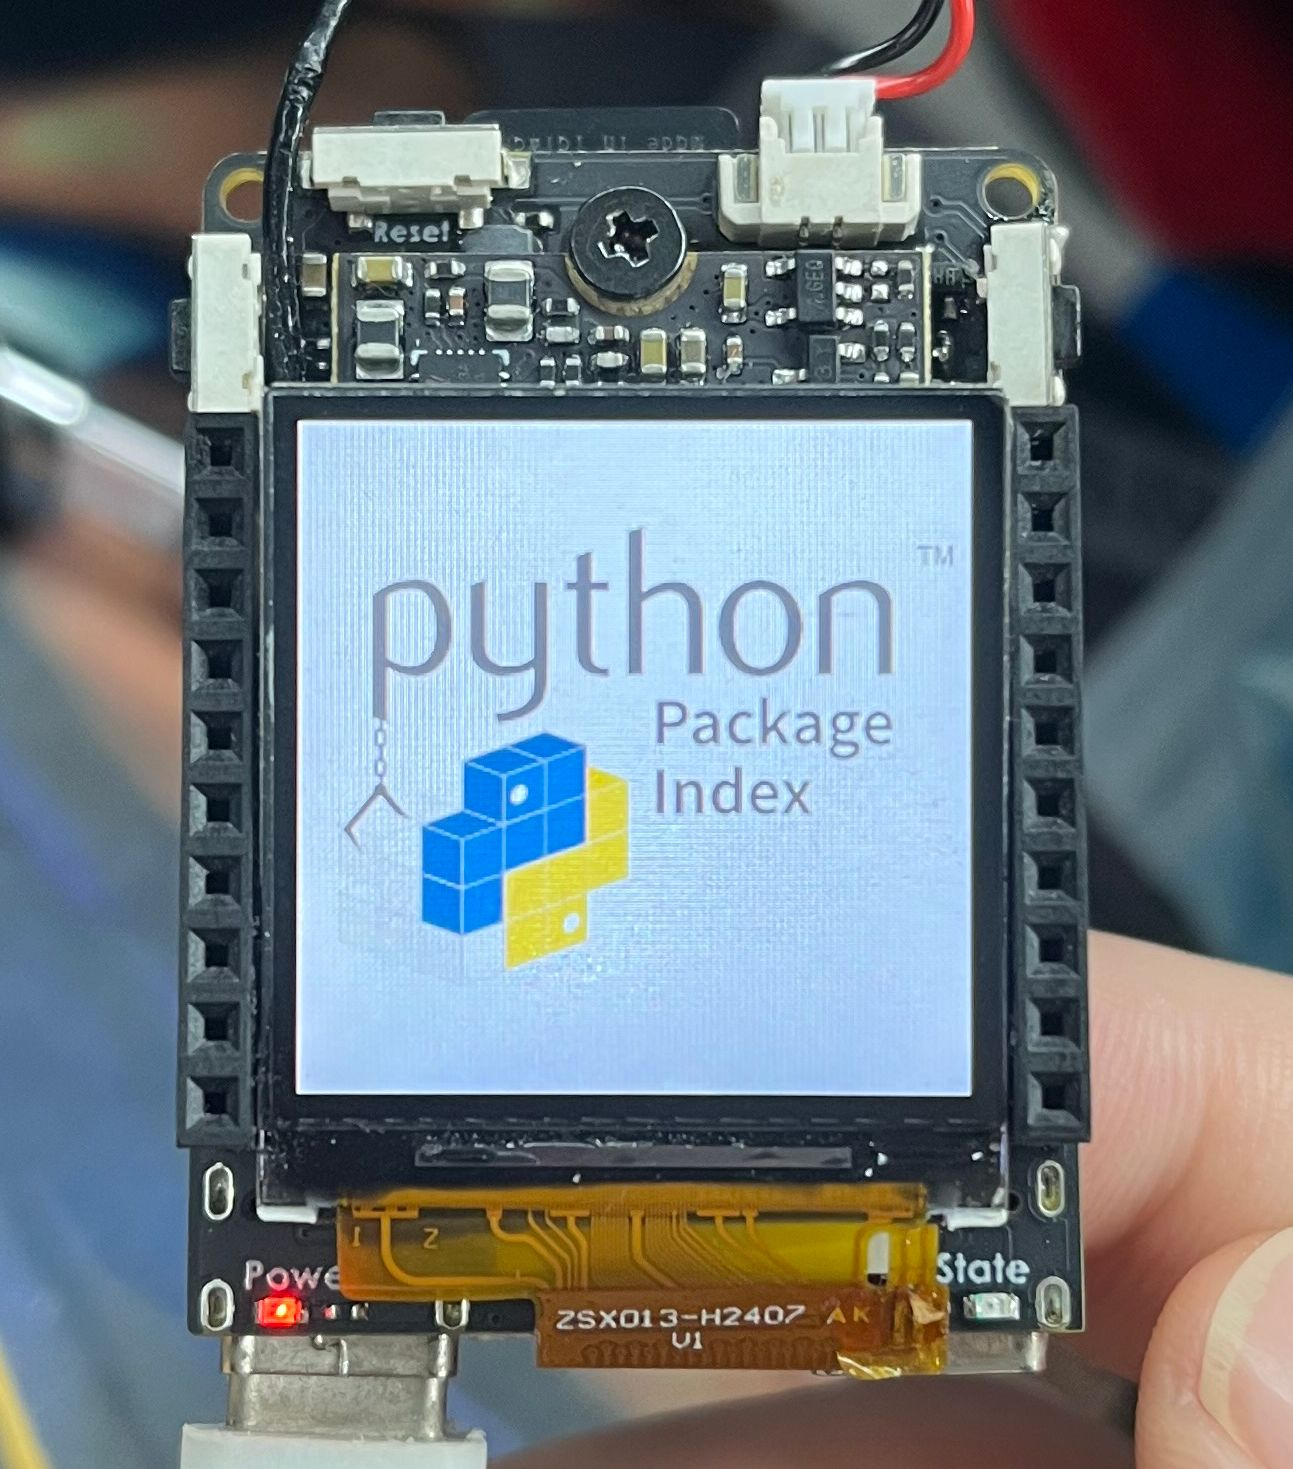

## 配置开机启动脚本

将需要开机自动运行的脚本文件名修改成 `main.py` 放到电脑显示的开发板的 U盘 中即可。

存放之前要注意，确保脚本是可运行的代码，脚本运行出错只会中断运行，不会有错误信息提示，U 盘位置对应着开发板 linux 系统的 /root/ 目录。

建议在adb终端使用 `poweroff` 命令来关机开发板。这样不至于因为突然断电而导致文件没有完全存入“U盘”中而丢失。

> 不要直接在开机启动脚本中进行代码调试，这样会出现一些奇怪的错误！

系统默认的启动脚本如下：

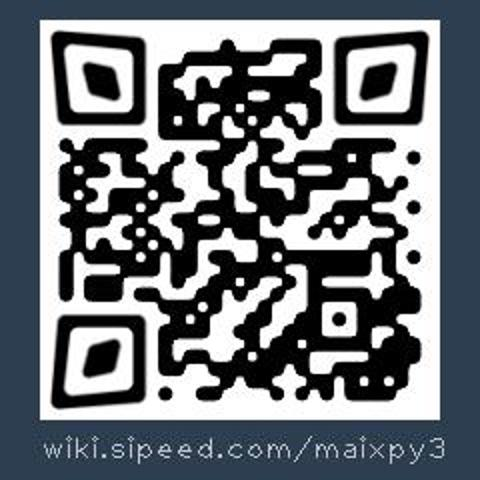

[ rpyc-kernel ]( running at Fri Jan 14 16:08:46 2022 )


In [1]:
#!/usr/bin/env python

from maix import display, image

qrcode = image.Image().open('/home/res/qrcode.png')

tmp = image.Image().new((240, 240), (0x2c, 0x3e, 0x50), "RGB")

tmp.draw_image(qrcode, 20, 10).draw_string(20, 214, "wiki.sipeed.com/maixpy3", 1, (0xbd, 0xc3, 0xc7))

display.show(tmp)


### 更多连接方式

使用 mobaxterm 可以进行串口连接和 ssh 连接，具体教程查看【<a href='/hardware/zh/maixII/M2/tools/mobaxterm.html' target=_blank>如何使用 mobaxterm</a>】

## 常见问题指南

### 如何退出 MaixPy3 IDE 

因为它是 jupyter 网络服务，所以需要从底下托盘右键退出，否则关闭浏览器后，它的网络服务还挂在后台运行的。

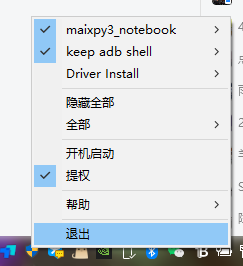

### 我的 MaixPy3 IDE 没有跳出浏览器，没有可以操作的页面。

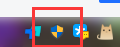

点击托盘查看 MaixPy3 jupyter 服务是否存在，存在则手动复制以下红框的地址到支持谷歌内核的浏览器中进入（有少数同学遇到）。

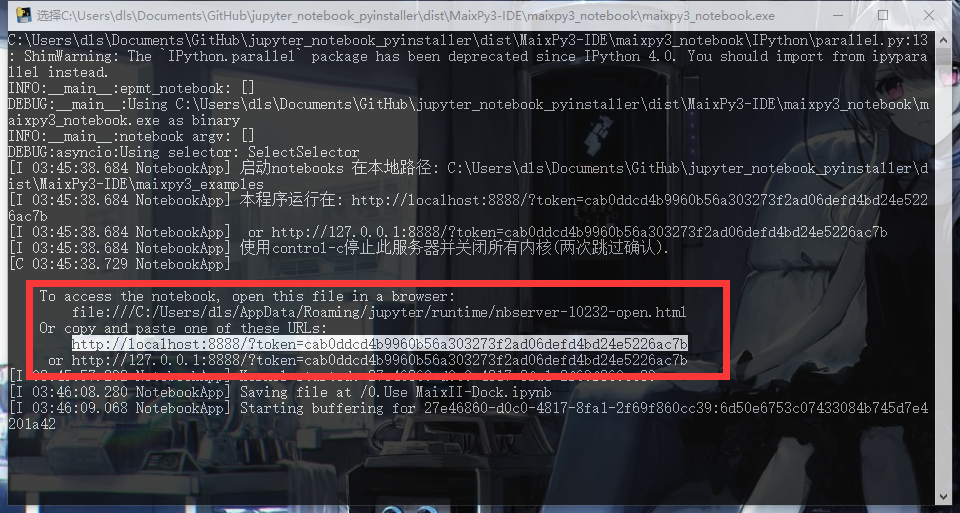

### 如何设置成中文界面

请搜索 jupyter notebook 如何设置成中文，修改对应的语言环境变量即可，如设置中文时需要变量名为：LANG 变量值：zh_CN.UTF8。

### 虚拟 U 盘文件复制失败，看不到文件。

务必断开磁盘后再操作防止文件没同步到 SD 卡导致丢失，有问题多试几次就好了，大于 10M 的大文件容易失败，可以在终端交互那里输入 sync 实时同步文件或输入 reboot 让 M2DOCK 关机重启。

注意 U 盘与 linux系统的  里的 `/root` 目录对应，拷贝到 U 盘的文件会同步出现。但从板子里创建到 /root/ 的文件不会同步出现在 U 盘，需要重启才能出现，或手动重新挂载 U 盘才会出现。

### 更多请查阅 [MaixPy3 常见问题与解决方法](https://wiki.sipeed.com/soft/maixpy3/zh/question/maixpy3_faq.html)
